In [122]:
import os
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import shape

import torch
from torch import cos, sub, t, unsqueeze
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms
from PIL import Image


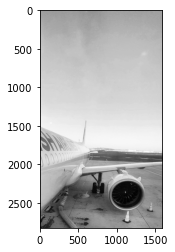

Image size is torch.Size([1, 3, 2825, 1589])


In [123]:
# global variables and settings
torch.no_grad()
img_path = 'imgs/airplane.jpg'

# preprocessor
prep = transforms.Compose([transforms.ToTensor()])

# read image
img = prep(Image.open(img_path)).unsqueeze(0)

# display image
plt.imshow(1 - img.squeeze()[0], cmap='Greys')
plt.show()

# print image size
print(f"Image size is {img.shape}")

tensor([1308])


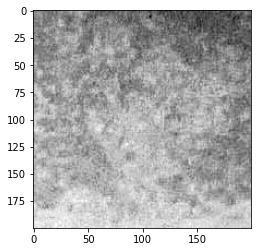

In [124]:
# extract a patch from the image
patch_size = 200
start_x = torch.randint(low=0, high=img.shape[2] - patch_size, size=[1])
start_y = torch.randint(low=0, high=img.shape[3] - patch_size, size=[1])

patch = img[:, :, start_x : start_x + patch_size, start_y : start_y + patch_size]

print(start_y)
plt.imshow(1 - patch.squeeze()[0], cmap='Greys')
plt.show()

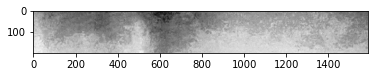

In [125]:
# extract a strip in the same area as the patch
strip = img[:, :, start_x : start_x + patch_size, :]

plt.imshow(1 - strip.squeeze()[0], cmap='Greys')
plt.show()

tensor([0.0000e+00, 1.0007e+00, 2.0014e+00,  ..., 1.3880e+03, 1.3890e+03,
        1.3900e+03])
torch.Size([1390])
torch.Size([1, 1, 1, 1390])


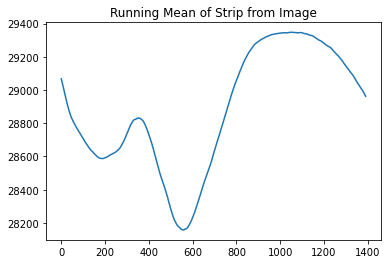

In [126]:
# create x axis for convenient display later
x_axis = torch.linspace(0, cross_correlation_coeff.shape[0], cross_correlation_coeff.shape[0])
print(x_axis)
print(x_axis.shape)

# find running mean of strip
mean_template = torch.ones(patch.shape) / patch.shape[0] / patch.shape[1]

running_mean = torch.conv2d(strip, mean_template)

print(running_mean.shape)
plt.plot(x_axis, running_mean.squeeze())
plt.title('Running Mean of Strip from Image')
plt.show()

In [127]:
# normalize image and patch
normalizer = transforms.Compose([transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

patch_normalized = normalizer(patch.squeeze()).unsqueeze(0)
strip_normalized = normalizer(strip.squeeze()).unsqueeze(0)

print(patch_normalized.shape)

torch.Size([1, 3, 200, 200])


In [128]:
# cross correlate (ie: convolve in ML speak)
output = torch.conv2d(strip_normalized, patch_normalized)

print(output.shape)

torch.Size([1, 1, 1, 1390])


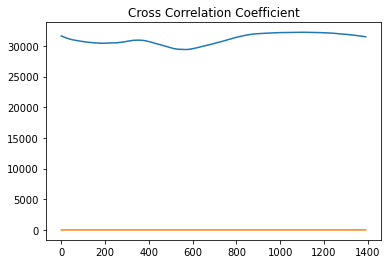

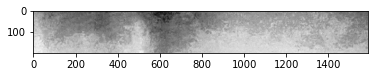

In [129]:
# display our output as x, y
cross_correlation_coeff = output.squeeze()

plt.plot(x_axis, cross_correlation_coeff)
plt.plot(x_axis, cross_correlation_coeff / running_mean.squeeze())
plt.title('Cross Correlation Coefficient')
plt.show()

plt.imshow(1 - strip.squeeze()[0], cmap='Greys')
plt.show()

# Explanation why it's incomplete:
Basically, calculating the NCC of a template on an image is not really a trivial task if you want to do it fast.

Follow equation at [https://uk.mathworks.com/help/images/ref/normxcorr2.html#bvh5vek-7] and observe [http://scribblethink.org/Work/nvisionInterface/nip.pdf] to observe faster way to compute.